# Import des données et exploration

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [38]:
csv_path = "archive/shot_logs.csv"  
df = pd.read_csv(csv_path, encoding='utf-8')

In [39]:
df.head()


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


| **Nom de la colonne**          | **Description**                                                                                                |
| ------------------------------ | -------------------------------------------------------------------------------------------------------------- |
| **SHOT_CLOCK**                 | Temps restant sur l’horloge des tirs (en secondes) au moment du tir. Peut être manquant sur certaines actions. |
| **MATCHUP**                    | Indique le match joué, souvent sous la forme `"LAL vs GSW"` ou `"GSW @ LAL"`.                                  |
| **LOCATION**                   | Désigne si l’équipe du joueur jouait à domicile (`HOME`) ou à l’extérieur (`AWAY`).                            |
| **W**                          | Résultat final du match pour l’équipe du joueur : `W` = victoire, `L` = défaite.                               |
| **GAME_ID**                    | Identifiant unique du match dans la base de données NBA.                                                       |
| **FINAL_MARGIN**               | Écart de points final du match (positif = victoire, négatif = défaite).                                        |
| **SHOT_NUMBER**                | Numéro d’ordre du tir tenté par le joueur dans le match (1er tir, 2e tir, etc.).                               |
| **PERIOD**                     | Quart-temps dans lequel le tir a eu lieu (1 à 4, parfois plus pour les prolongations).                         |
| **GAME_CLOCK**                 | Temps restant dans le quart-temps au moment du tir (format `MM:SS`).                                           |
| **DRIBBLES**                   | Nombre de dribbles effectués par le joueur avant de tirer.                                                     |
| **TOUCH_TIME**                 | Durée (en secondes) pendant laquelle le joueur a eu la balle avant de tirer.                                   |
| **SHOT_DIST**                  | Distance du tir par rapport au panier (en pieds).                                                              |
| **PTS_TYPE**                   | Type de tir : `2` pour un tir à 2 points, `3` pour un tir à 3 points.                                          |
| **SHOT_RESULT**                | Résultat du tir : `"Made"` = réussi, `"Missed"` = raté.                                                        |
| **CLOSEST_DEFENDER**           | Nom du défenseur le plus proche au moment du tir.                                                              |
| **CLOSEST_DEFENDER_PLAYER_ID** | Identifiant du défenseur le plus proche.                                                                       |
| **CLOSE_DEF_DIST**             | Distance (en pieds) entre le tireur et le défenseur le plus proche.                                            |
| **FGM**                        | *Field Goal Made* : 1 si le tir est marqué, 0 sinon.                                                           |
| **PTS**                        | Nombre de points marqués sur l’action (0, 2 ou 3).                                                             |
| **player_name**                | Nom du joueur qui a tenté le tir.                                                                              |
| **player_id**                  | Identifiant unique du joueur dans la base NBA.                                                                 |


In [40]:
print("shape :" ,df.shape)
print(df.dtypes)

shape : (128069, 21)
GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object


In [41]:
def check_na():
    print("\n=== VALEURS MANQUANTES ===")
    na_counts = df.isna().sum()
    na_pct = (na_counts / len(df)) * 100
    na_summary = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct.round(2)})
    print(na_summary.sort_values(by='missing_%', ascending=False))

In [42]:
check_na()
print()
print(df['SHOT_RESULT'].value_counts())


=== VALEURS MANQUANTES ===
                            missing  missing_%
SHOT_CLOCK                     5567       4.35
MATCHUP                           0       0.00
LOCATION                          0       0.00
W                                 0       0.00
GAME_ID                           0       0.00
FINAL_MARGIN                      0       0.00
SHOT_NUMBER                       0       0.00
PERIOD                            0       0.00
GAME_CLOCK                        0       0.00
DRIBBLES                          0       0.00
TOUCH_TIME                        0       0.00
SHOT_DIST                         0       0.00
PTS_TYPE                          0       0.00
SHOT_RESULT                       0       0.00
CLOSEST_DEFENDER                  0       0.00
CLOSEST_DEFENDER_PLAYER_ID        0       0.00
CLOSE_DEF_DIST                    0       0.00
FGM                               0       0.00
PTS                               0       0.00
player_name                     

In [43]:
#pourquoi shot_clock a parfois des valuers manquantes ? 

#h1 se sont les fautes (lancés frants) ou quel cas on devrais avoir de pts_types a 1 (faux)
df[df['SHOT_CLOCK'].isna()]['PTS_TYPE'].value_counts()

PTS_TYPE
2    3321
3    2246
Name: count, dtype: int64

In [44]:
#h2 en debut de matach ? 
df[df['SHOT_CLOCK'].isna()]['PERIOD'].value_counts()

PERIOD
1    1578
2    1503
4    1182
3    1179
5     103
6      19
7       3
Name: count, dtype: int64

In [45]:
df[df['SHOT_CLOCK'].isna()]['GAME_CLOCK'].value_counts()

GAME_CLOCK
0:01     849
0:02     525
0:00     480
0:03     385
0:04     273
        ... 
11:52      1
2:57       1
10:56      1
0:42       1
10:42      1
Name: count, Length: 680, dtype: int64

Les valeurs manquantes dans SHOT_CLOCK apparaissent majoritairement lorsque le GAME_CLOCK est inférieur à 24 secondes.
Cela correspond à la fin des quart-temps, moment où le chronomètre des tirs (shot clock) n’est plus affiché car il est absorbé par le chronomètre principal du jeu.
Ces valeurs NaN sont donc logiques et ne traduisent pas une erreur de données.

Cependant certaines données sont plus tard pour l'instant aucune conclusion n'est possible.

In [46]:
missing_shot_clock = df[df['SHOT_CLOCK'].isna()]
print(missing_shot_clock[['PTS_TYPE', 'SHOT_DIST', 'SHOT_RESULT']].head(10))

     PTS_TYPE  SHOT_DIST SHOT_RESULT
2           2       10.1      missed
24          3       25.2      missed
54          3       34.4      missed
76          2       13.1        made
129         2       12.0      missed
134         2       17.9      missed
141         2       10.4        made
145         2       18.3      missed
184         3       27.1      missed
204         3       32.9      missed


In [47]:
# TODO: Pour l'instant, on supprime les lignes sans SHOT_CLOCK
#       (à revoir plus tard : comprendre la logique du manquant avant d’imputer)
df = df.dropna(subset=['SHOT_CLOCK']).copy()

# Vérification : s'il reste encore des valeurs manquantes
missing_count = df['SHOT_CLOCK'].isna().sum()
print(f"Valeurs manquantes restantes dans SHOT_CLOCK : {missing_count}")


Valeurs manquantes restantes dans SHOT_CLOCK : 0


In [48]:
#TODO mettre le game clock en temps complet prendre la periode (1,2,3,4) 1 quart temps = 12 min 

# --- Convertir GAME_CLOCK en secondes ---
def clock_to_seconds(clock_str):
    """Convertit une chaîne 'MM:SS' en secondes."""
    if isinstance(clock_str, str):
        m, s = clock_str.split(':')
        return int(m) * 60 + int(s)
    return None

#game clock est décroissant on commence à 12 min (ici on veux récupérer le temps écoulé depuis le depuis du quart temps)
df['TIME_SPENT_QUATER_SEC'] = 12*60 - df['GAME_CLOCK'].apply(clock_to_seconds) 

# Calculer le temps absolu depuis le début du match
df['GAME_TIME_TOTAL'] = (df['PERIOD'] - 1) * 12*60 + (df['TIME_SPENT_QUATER_SEC'])

In [49]:
#on one hot code les collonnes interresantes et drop le non intéressantes 
# Vérifier si SHOT_RESULT contient déjà des valeurs numériques
if df['SHOT_RESULT'].dtype == 'object':
    df['SHOT_RESULT'] = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

# Vérifier si LOCATION contient déjà des valeurs numériques
if df['LOCATION'].dtype == 'object':
    df['LOCATION'] = df['LOCATION'].map({'H': 1, 'A': 0})
    
#indique si le shot est contesté ou non 
if 'CLOSE_DEF_DIST' in df.columns:
    df['CONTESTED'] = (df['CLOSE_DEF_DIST'] < 2.0).astype(int)

#si il reste une possession dans le quart-temps
if 'TIME_SPENT_QUATER_SEC' in df.columns:
    df['CLUTCH'] = (df['TIME_SPENT_QUATER_SEC'] > 11*60+40).astype(int)


# --- Conversion pied → mètre ---
# 1 pied = 0.3048 m
if 'SHOT_DIST' in df.columns:
    df['SHOT_DIST'] = df['SHOT_DIST'] * 0.3048

if 'CLOSE_DEF_DIST' in df.columns:
    df['CLOSE_DEF_DIST'] = df['CLOSE_DEF_DIST'] * 0.3048


df = df.drop([
    'MATCHUP',
    'W', 
    'GAME_ID',
    'CLOSEST_DEFENDER',
    'CLOSEST_DEFENDER_PLAYER_ID',
    'FGM',
    'PTS',
    'player_id',
    'PERIOD', 
    'GAME_CLOCK',
    'PTS_TYPE',  # dépend de la distance au panier, déjà prise en compte
    'FINAL_MARGIN',
    'SHOT_CLOCK'
], axis=1, errors='ignore')


df.head()

,LOCATION,SHOT_NUMBER,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,player_name,TIME_SPENT_QUATER_SEC,GAME_TIME_TOTAL,CONTESTED,CLUTCH
0,0,1,2,1.9,2.34696,1,0.39624,brian roberts,651,651,1,0
1,0,2,0,0.8,8.59536,0,1.85928,brian roberts,706,706,0,1
3,0,4,2,1.9,5.24256,0,1.03632,brian roberts,13,733,0,0
4,0,5,2,2.7,1.12776,0,0.33528,brian roberts,86,806,1,0
5,0,6,2,4.4,5.60832,0,0.79248,brian roberts,225,945,0,0


On cherche à créer un dataset pour un ou deux jouers en particulier pour prédire leur prédiction de shot en particulier 

In [50]:
print(df['player_name'].value_counts())

player_name
lamarcus aldridge    1010
james harden         1006
mnta ellis           1004
klay thompson         953
lebron james          947
                     ... 
mike miller            94
joey dorsey            88
alan crabbe            87
jerome jordan          80
greg smith             46
Name: count, Length: 281, dtype: int64


In [51]:
df['player_name'].value_counts()['stephen curry']

np.int64(941)

In [52]:
print("shape :" ,df.shape)
print(df.dtypes)

shape : (122502, 12)
LOCATION                   int64
SHOT_NUMBER                int64
DRIBBLES                   int64
TOUCH_TIME               float64
SHOT_DIST                float64
SHOT_RESULT                int64
CLOSE_DEF_DIST           float64
player_name               object
TIME_SPENT_QUATER_SEC      int64
GAME_TIME_TOTAL            int64
CONTESTED                  int64
CLUTCH                     int64
dtype: object


On cherche à fair une regression logistique donc on dois standardisé les données car elle est sensible à l'échelle

In [53]:
# Dataset pour LeBron James
df_lebron = df[df['player_name'] == 'lebron james'].drop(['player_name'], axis=1)

# Dataset pour Stephen Curry
df_curry = df[df['player_name'] == 'stephen curry'].drop(['player_name'], axis=1)

In [54]:
df_lebron.describe()

,LOCATION,SHOT_NUMBER,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,TIME_SPENT_QUATER_SEC,GAME_TIME_TOTAL,CONTESTED,CLUTCH
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.506864,10.674762,4.601901,5.671067,4.207688,0.494192,1.276587,369.540655,1389.857445,0.141499,0.021119
std,0.500217,6.587822,5.333578,4.670125,2.805839,0.500230,1.021051,209.284236,846.421217,0.348720,0.143858
min,0.000000,1.000000,0.000000,-4.300000,0.030480,0.000000,0.000000,11.000000,13.000000,0.000000,0.000000
25%,0.000000,5.000000,1.000000,2.300000,1.493520,0.000000,0.777240,187.000000,652.000000,0.000000,0.000000
50%,1.000000,10.000000,3.000000,4.500000,3.718560,0.000000,1.158240,361.000000,1380.000000,0.000000,0.000000
75%,1.000000,15.000000,7.000000,7.800000,7.071360,1.000000,1.524000,565.000000,2066.000000,0.000000,0.000000
max,1.000000,35.000000,26.000000,23.300000,11.216640,1.000000,16.215360,717.000000,3572.000000,1.000000,1.000000


In [55]:
df_curry.describe()

,LOCATION,SHOT_NUMBER,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT,CLOSE_DEF_DIST,TIME_SPENT_QUATER_SEC,GAME_TIME_TOTAL,CONTESTED,CLUTCH
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,0.454835,9.421892,3.617428,3.833900,5.264618,0.493092,1.371082,398.515409,1378.664187,0.121148,0.013815
std,0.498221,5.659816,4.081129,3.260441,2.789592,0.500218,0.837733,188.788092,863.510575,0.326472,0.116785
min,0.000000,1.000000,0.000000,0.000000,0.030480,0.000000,0.000000,12.000000,12.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,1.000000,2.316480,0.000000,0.853440,244.000000,509.000000,0.000000,0.000000
50%,0.000000,9.000000,2.000000,3.000000,6.644640,0.000000,1.219200,417.000000,1418.000000,0.000000,0.000000
75%,1.000000,14.000000,6.000000,5.800000,7.589520,1.000000,1.706880,560.000000,2002.000000,0.000000,0.000000
max,1.000000,26.000000,23.000000,20.000000,9.814560,1.000000,8.747760,714.000000,3563.000000,1.000000,1.000000


| Variable                      | Curry (moy ± std) | LeBron (moy ± std) | Interprétation                          |
| ----------------------------- | ----------------- | ------------------ | --------------------------------------- |
| **DRIBBLES**                  | 3.6 ± 4.1         | 4.6 ± 5.3          | Petits entiers (0–10), faible amplitude |
| **TOUCH_TIME (s)**            | 3.8 ± 3.3         | 5.7 ± 4.7          | Quelques secondes                       |
| **SHOT_DIST (ft)**            | 17.3 ± 9.2        | 13.8 ± 9.2         | Ordre de grandeur 10–20                 |
| **CLOSE_DEF_DIST (ft)**       | 4.5 ± 2.7         | 4.2 ± 3.3          | Valeurs de 0–10                         |
| **TIME_SPENT_QUATER_SEC (s)** | 398 ± 189         | 370 ± 209          | Centaines de secondes                   |
| **GAME_TIME_TOTAL (s)**       | 1379 ± 864        | 1390 ± 846         | Milliers de secondes                    |

Les moyennes et écarts-types montrent des ordres de grandeur très différents :
Ces écarts d’échelle (ex. GAME_TIME_TOTAL ≈ 1400 vs DRIBBLES ≈ 4) faussent les coefficients pour tout modèle linéaire (logistique, SVM, etc.).
Standardisation nécessaire.


In [56]:
#on centre et réduit les données non bianaires Standardisation 
cols_to_standardize = [
    'DRIBBLES',
    'TOUCH_TIME',
    'SHOT_DIST',
    'CLOSE_DEF_DIST',
    'TIME_SPENT_QUATER_SEC',
    'GAME_TIME_TOTAL'
]

cols_to_standardize = [c for c in cols_to_standardize if c in df.columns]


scaler = StandardScaler()
df_curry[cols_to_standardize] = scaler.fit_transform(df_curry[cols_to_standardize])
df_lebron[cols_to_standardize] = scaler.fit_transform(df_lebron[cols_to_standardize])


print("Standardisation terminée sur lebron dataset:", cols_to_standardize)
print("Forme du DataFrame :", df_lebron.shape)
print(df_lebron[cols_to_standardize].describe().T[['mean', 'std']])

print("Standardisation terminée sur curry dataset:", cols_to_standardize)
print("Forme du DataFrame :", df_curry.shape)
print(df_curry[cols_to_standardize].describe().T[['mean', 'std']])

Standardisation terminée sur lebron dataset: ['DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'TIME_SPENT_QUATER_SEC', 'GAME_TIME_TOTAL']
Forme du DataFrame : (947, 11)
                               mean       std
DRIBBLES              -3.751546e-17  1.000528
TOUCH_TIME             1.500618e-17  1.000528
SHOT_DIST              9.754019e-17  1.000528
CLOSE_DEF_DIST        -7.127937e-17  1.000528
TIME_SPENT_QUATER_SEC -6.002473e-17  1.000528
GAME_TIME_TOTAL        8.440978e-17  1.000528
Standardisation terminée sur curry dataset: ['DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'TIME_SPENT_QUATER_SEC', 'GAME_TIME_TOTAL']
Forme du DataFrame : (941, 11)
                               mean       std
DRIBBLES              -4.530559e-17  1.000532
TOUCH_TIME            -1.359168e-16  1.000532
SHOT_DIST              2.491808e-16  1.000532
CLOSE_DEF_DIST         1.132640e-17  1.000532
TIME_SPENT_QUATER_SEC  0.000000e+00  1.000532
GAME_TIME_TOTAL        1.132640e-17  1.000532


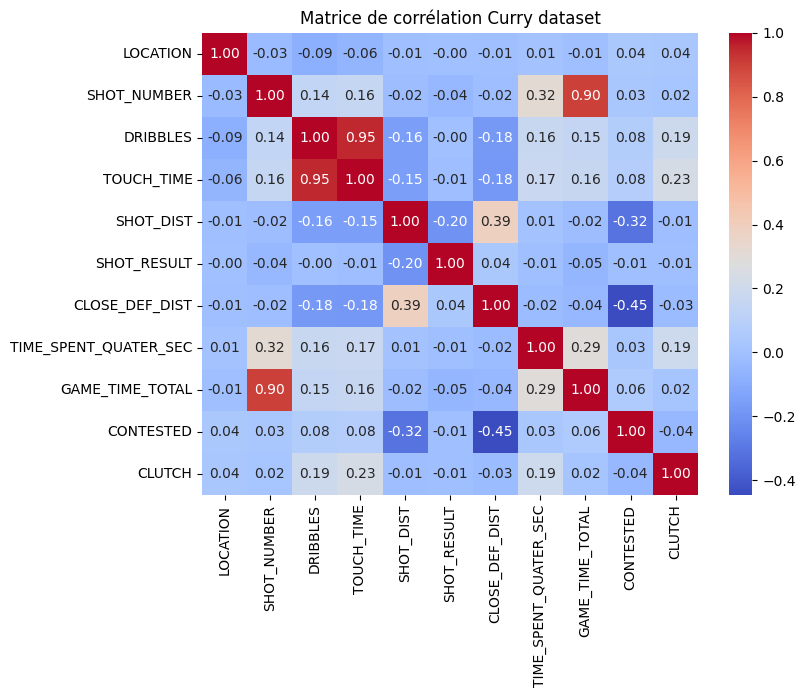

In [57]:
corr_matrix = df_curry.corr(numeric_only=True)

corr_matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation Curry dataset')
plt.show()


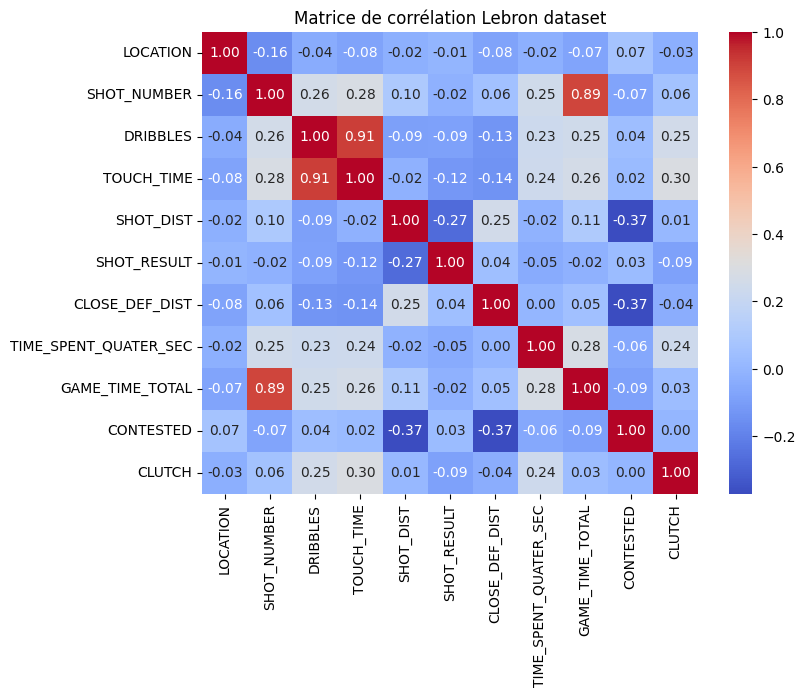

In [58]:
corr_matrix = df_lebron.corr(numeric_only=True)

corr_matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation Lebron dataset')
plt.show()


GAME_TIME_TOTAL et SHOT_NUMBER.
Cela paraît logique : plus le temps s’écoule, plus un joueur a d’occasions de tirer.
Toutefois, il peut être intéressant de conserver ces deux variables, car certains joueurs (les remplaçants) disposent de moins de temps de jeu et donc d’un nombre de tirs plus limité. Leur profil de tir peut différer sensiblement de celui des titulaires. On pourras retirer pour nos jeux de donnés dans un second temps.

TOUCH_TIME et DRIBBLES montrent également une corrélation naturelle :
plus un joueur dribble, plus il conserve la balle longtemps.
Néanmoins, cette relation reste intéressante à analyser, car elle peut révéler des différences d’efficacité selon le style de jeu : par exemple, déterminer si un joueur marque davantage après plusieurs dribbles ou sur réception directe (catch-and-shoot).

In [ ]:
import os

# --- Création d'un dossier de sortie s'il n'existe pas ---
output_dir = "data_cleaned"
os.makedirs(output_dir, exist_ok=True)

# --- Sauvegarde des datasets traités ---
curry_path = os.path.join(output_dir, "curry_preprocessed.csv")
lebron_path = os.path.join(output_dir, "lebron_preprocessed.csv")

df_curry.to_csv(curry_path, index=False)
df_lebron.to_csv(lebron_path, index=False)

print("Sauvegarde terminée avec succès !")
print(f"Fichiers enregistrés dans le dossier : {output_dir}")
print(f"- {curry_path}")
print(f"- {lebron_path}")


✅ Sauvegarde terminée avec succès !
Fichiers enregistrés dans le dossier : data_cleaned
- data_cleaned\curry_preprocessed.csv
- data_cleaned\lebron_preprocessed.csv
